<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Lab 1.4 - KNN (classification and imputation) and More on Python Programming


---

### 1. Load packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 2. Let's see if we can  code Knn ourselves

In [3]:
from __future__ import division
from collections import Counter
from linear_algebra import distance ## packages from DSCT, let's talk about this
from statistics import mean ## packages from DSCT
import math, random

''' Remember that the prediction for each new point on KNN depends on the number of points close to it
    If we have a set of K neighbors, the first thing we need to do is to create a count of votes function'''
def first_majority_votes(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner
    ## The underscore, it's conventional in python to use _ for throwaway variables. 
    ## It just indicates that the loop variable isn't actually used.
    ## http://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python


''' We also need to take care of the possibility of ties when votes takes place
    One can take care of this in different forms
    1. Select a winner at Random
    2. Give a weight to the votes based on distance
    3. Decrease the number of k(s) until you find the unique winner'''

def majority_vote(labels):
    """assumes that labels are ordered using a distance (from nearest to farthest)"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])
    if num_winners == 1:
        return winner                     # This is the unique winner!!!
    else:
        return majority_vote(labels[:-1]) # If not, try again without the farthest


'''Now lets create the KNN classifier '''

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    
    # order the labeled points from nearest to farthest
    # big difference between sort and sorted!!!
    by_distance = sorted(labeled_points, key=lambda (point, _): distance(point, new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)


In [4]:
''' In this part we are using a fake dataset where you have long and lat for individuals who use P
    Code in Python, R and STATA in the United States'''

cities =[(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),
          (-112.016666666667,33.4333333333333,'STATA'),(-110.933333333333,32.1166666666667,'STATA'),
          (-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),
          (-118.233333333333,34.05,'STATA'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),
          (-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),
          (-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),
          (-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),
          (-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),
          (-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),
          (-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'STATA'),
          (-81.3833333333333,28.55,'STATA'),(-82.5333333333333,27.9666666666667,'STATA'),
          (-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),
          (-87.75,41.7833333333333,'STATA'),(-86.2833333333333,39.7333333333333,'STATA'),
          (-93.65,41.5333333333333,'STATA'),(-97.4166666666667,37.65,'STATA'),(-85.7333333333333,38.1833333333333,'Python'),
          (-90.25,29.9833333333333,'STATA'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),
          (-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),
          (-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),
          (-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'STATA'),
          (-94.5833333333333,39.1166666666667,'STATA'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),
          (-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'STATA'),(-71.4333333333333,42.9333333333333,'R'),
          (-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),
          (-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),
          (-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'STATA'),
          (-84.5166666666667,39.15,'STATA'),(-81.85,41.4,'STATA'),(-82.8833333333333,40,'STATA'),
          (-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),
          (-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),
          (-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),
          (-97.7,30.3,'Python'),(-96.85,32.85,'STATA'),(-95.35,29.9666666666667,'STATA'),
          (-98.4666666666667,29.5333333333333,'STATA'),(-111.966666666667,40.7666666666667,'Python'),
          (-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),
          (-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'STATA')]

cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

print type(cities), len(cities)
print ''
print cities[:10][0]

<type 'list'> 75

([-86.75, 33.5666666666667], 'Python')


In [5]:
from plot_state_borders import plot_state_borders
def plot_cities():
    plt.figure(figsize=(15,10))
    # key is language, value is pair (longitudes, latitudes)
    plots = { "STATA" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "STATA" : "o", "Python" : "s", "R" : "^" }
    colors  = { "STATA" : "r", "Python" : "y", "R" : "g" }
    s = 100 #s=size

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.iteritems():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s=s)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

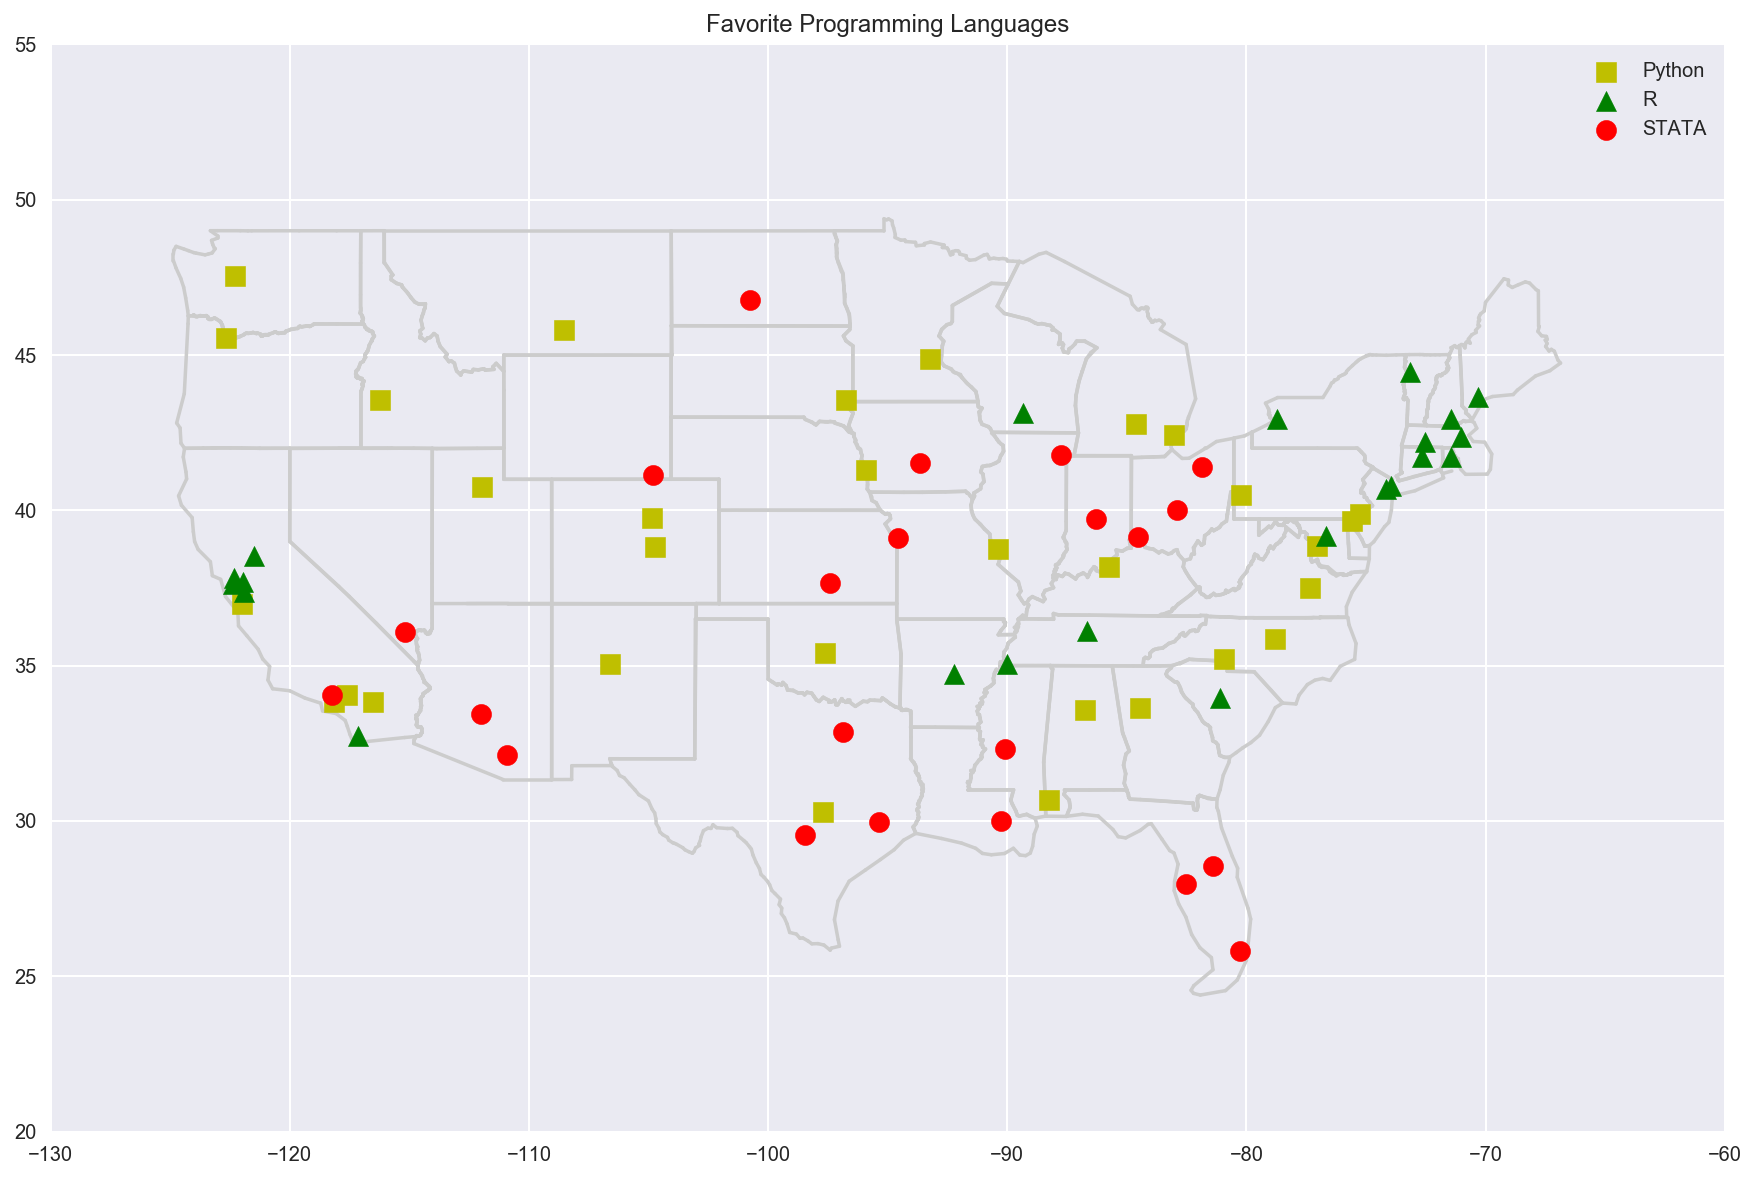

In [6]:
plot_cities()

In [7]:
''' Can we predict each city/state preferred programming language using its neighbors other than itself '''
for k in [1, 3, 5, 7]:
    num_correct = 0
    for location, actual_language in cities:
        other_cities = [other_city for other_city in cities
                        if other_city != (location, actual_language)]
        
        predicted_language = knn_classify(k, other_cities, location)
        if predicted_language == actual_language: 
            num_correct += 1
    print k, "neighbor[s]:", num_correct, "correct out of", len(cities)


1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


In [8]:
def classify_and_plot_grid(number):
    k =int(number)
    plt.figure(figsize=(15,10))
    plots = { "STATA" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "STATA" : "o", "Python" : "s", "R" : "^" }
    colors  = { "STATA" : "r", "Python" : "y", "R" : "g" }
    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.iteritems():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

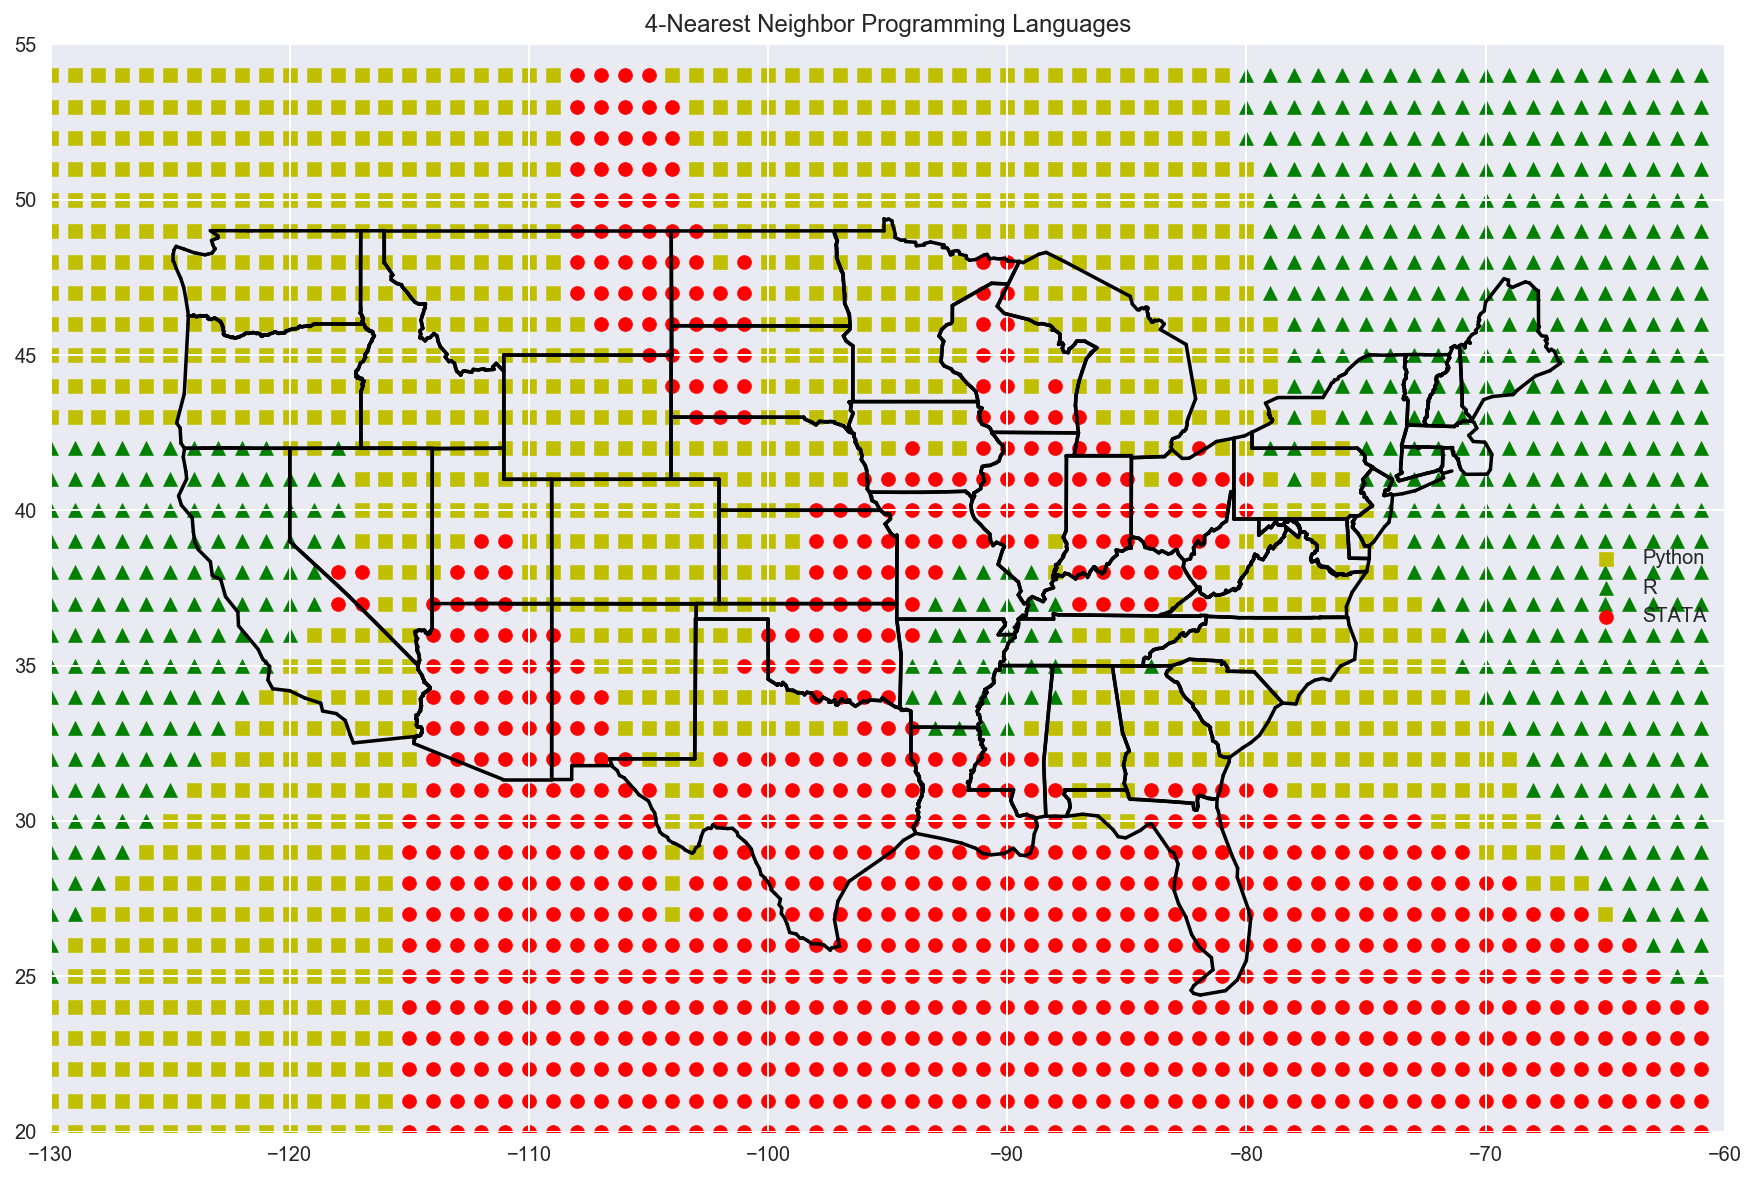

In [9]:
classify_and_plot_grid(4)

The graph shows that in the state/city of san francisco for example, before, it was Stata and R, but using the predictions 4 neighbors, it shows that San francisco should 

---

### 3. Load datasets
The approach from the previous code is naive as it doesn't take into account distance and weigth, nor accuracy

Let's use from sklearn.neighbors import KNeighborsClassifier and make it more realiable

In [10]:
'''Churn rate, as it relates to mobile network carriers, is the percentage of subscribers in a 
given time frame that cease to use the company's services for one reason or another. '''

churn  = pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/cell_phone_churn/cell_phone_churn.csv')


---

### 4. Using the cell phone churn dataset let's find the optimal neighbors and weighting to predict churn using gridsearch

Show the cross-validated accuracy of the model.

In [11]:
churn.head(2)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


---
#### 4.1 The target var is churn
1. Print the unique entries of churn
2. Covert the variable to 0 and 1 variable
3. How many 0 and 1 values are in the churn variable


In [ ]:
''' you can specify if you want False to be 1 or 0, but by default (boolian False = 0, True =1)'''


---
#### 4.2 There are other variables that need to be transformed into a 0 a 1
1. vmail_plan
2. vmail_message


where yes = 1 

---
#### 4.3 Now lets define y and X (exclude (state and churn)

---
#### 4.4 Using the code below, gridsearch the number of neighbors, and weights uniform , distance

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
# %%time
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance'],
    'p' :[2],
    'metric' : ['minkowski']
}

'''weights =  function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point 
will have a greater influence than neighbors which are further away'''


'''metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, 
and with p=2 is equivalent to the standard Euclidean metric. 
See the documentation of the DistanceMetric class for a list of available metrics.'''

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)
knn_gs.fit(X, y)

---
#### 4.5 What are the best parameters?

---
#### 4.6 Using the code below, crossvalidate the classifier using StratifiedKFold
- Notice that we didn't divide our data into train or test
- Also, remember that KNN is a lazy learning algorithm, the model does not use the training data points to do any generalization (there is no explicit training phase or it is very minimal) => this makes the training part fast.
- Since it doesn't generalized, KNN keeps all the training data => this means that all the training data is needed during the testing phase.

In [ ]:
from sklearn.cross_validation import StratifiedKFold

''' Stratified K-Folds cross-validator
    Provides train/test INDICES to split data in train/test sets.
    This cross-validation object is a variation of KFold that returns stratified folds. 
    The folds are made by preserving the percentage of samples for each class.
    n_splits=3, shuffle=False, random_state=None'''

cv_indices = StratifiedKFold(y, n_folds=5, shuffle=True)

''' y : Samples to split in K folds (has to be an array)'''

# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    scores = []
    
    for train_i, test_i in cv_indices:
        
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        y_train = y[train_i]
        y_test = y[test_i]
        print 'Xtrain and ytrain shapes:\n', X_train.shape, y_train.shape
        print 'Xtest and ytest shapes:\n', X_test.shape, y_test.shape
        
        knn.fit(X_train, y_train)
        
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc) 
        print ('-' * 20 + '\n')
    print('Mean CV accuracy:', np.mean(scores))


In [ ]:
accuracy_crossvalidator(X, y, best_knn, cv_indices)

---
#### 4.7 Using a heatmap, see any correlations

---
#### 4.8 Plot the kNN prediction boundary 
- Use only a set of variables 


In [ ]:
from plotter_knn import KNNBoundaryPlotter
'''Code by Kiefer, K - GA'''
##http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

kbp = KNNBoundaryPlotter(churn, 'account_length', 'custserv_calls', 
                         'churn', nn_range=range(1,20))
kbp.knn_mesh_runner()

kbp.knn_interact()

---

## 5. Variable imputation with KNeighbors

You can actually do both classification _and_ regression with KNN. It is quite flexible due to its simplicity. One of it's most useful features is the ability to perform very nice imputation.

---

#### 5.1 Load the coffee data, count the missing values

In [ ]:
coffee = pd.read_csv('../../datasets/coffee_preferences/dat12-coffee-preferences.csv')
coffee.head(3)

---

#### 5.2 For each of the missing columns, build a `KNeighborsClassifier` to predict rating for that column based on the other columns

Another great benefit of KNN is the ease with which it can do multi-class problems like this.

[Note: there is a more complicated way to do this, lets use a simple version]

In [ ]:
#Note rating_cols is called LIST COMPREHENSION.. you can define it, and call it in your dataframe
rating_cols = [col for col in coffee.columns if not col in ['Timestamp','Name']]

predictors = coffee[rating_cols]

predictors.dropna(inplace=True, axis=1)

In [ ]:
'''This are our columns with no missing values'''
print predictors.isnull().sum()

predictors.head(3)

In [ ]:
coffee_imputed = coffee.copy()

for col in rating_cols:
    if col not in predictors.columns:
        # In here are referring to cols -> ['blue bottle', 'starbucks', 'philz']
        cols = [col]+list(predictors.columns)
        
        # dataset with the 3 columns
        to_impute = coffee[cols]
        
        # drop all na
        to_impute_valid = to_impute.dropna()
        
        # build model predicting blue bottle from starbucks and philz
        knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
        knn.fit(to_impute_valid[predictors.columns].values, to_impute_valid[col].values)

        # make the predictions for the missing values in blue bottle
        pred = predictors.loc[to_impute[col].isnull(), :]
        pred = knn.predict(pred)
        
        # put the predicted values for blue bottle into the "imputed
        coffee_imputed.loc[to_impute[col].isnull(), col] = pred


In [ ]:
print coffee_imputed.isnull().sum()
coffee_imputed.head(4)